### Important-Announcement-on-ML

<a href='http://www.kgptalkie.com' target="_blank"> <img src='kgptalkie_strips.png'/></a>


### ML  Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


# Spam Text Classification

Here are some of the NLP techniques that we will be using in this notebook.
- N-Gram, Bi-Gram etc
- Bag of Words (BoW)
- Term Frequency Calculation TF
- Inverse Document Frequency IDF
- TFIDF Term Frequency - Inverse Document Frequency
- Text Classification

### N-Gram 

##### please turn your page
- Unigram: `please | turn | your | page`
- Bigram: `please turn | turn your | your page`
- Trigram: `please turn your | turn your page`

You can think of an N-gram as the sequence of N words, by that notion, a 2-gram (or bigram) is a two-word sequence of words like “please turn”, “turn your”, or ”your page”, and a 3-gram (or trigram) is a three-word sequence of words like “please turn your”, or “turn your page”

### Bag of Words (BoW) 

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval. 

`x = ['which book is this', 'this is book and this is math']`

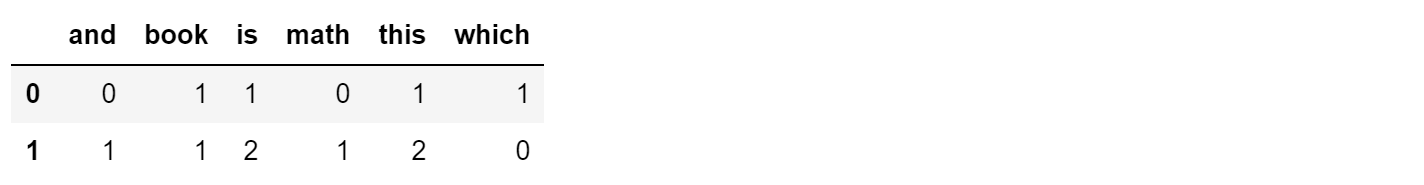

### Term Frequency (TF)

Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.



`x = ['which book is this', 'this is book and this is math']`

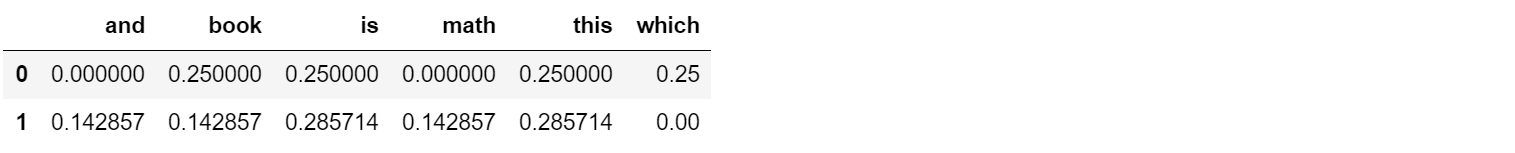

### Inverse Document Frequency IDF 

`idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True`

`log -> log base e`

where, N is the total number of rows and n is the number of rows in which the word was present.

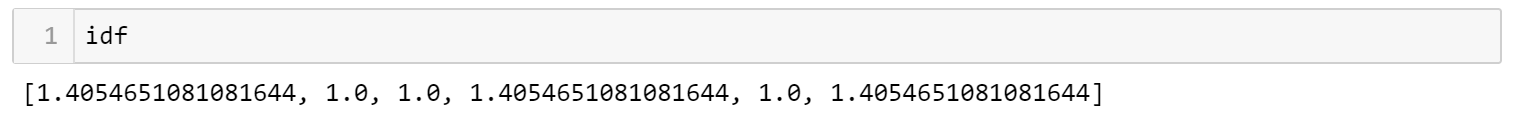

### TFIDF 

- Term Frequency: This summarizes how often a given word appears within a document.
- Inverse Document Frequency: This downscales words that appear a lot across documents.

`TF * IDF`

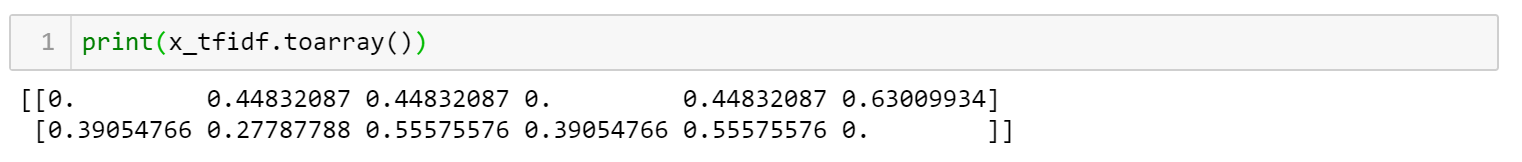

## Code Along 

Data Visualization Course
https://bit.ly/udemy95off_kgptalkie 

What you will learn in this course

✔✔ Learn complete Exploratory Data Analysis on latest Covid-19 Dataset

✔✔ Learn EDA on Kaggle's Boston Housing and Titanic Datasets

✔✔ Complete EDA on IPL Cricket Matches, FIFA World Cup Matches, and Text Data

✔✔ And so much more

## Data Loading

In [1]:
# loading the data -> data visualization -> train test split
# -> model building -> training -> evaluation -> streamlit application

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df  = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.shape

(5572, 4)

In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Dataset Balancing

In [8]:
ham = df[df['label']=='ham']
ham.shape

(4825, 4)

In [9]:
spam = df[df['label']=='spam']
spam.shape

(747, 4)

In [10]:
ham = ham.sample(spam.shape[0])

In [11]:
ham.shape


(747, 4)

In [12]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)

In [13]:
data.shape

(1494, 4)

In [14]:
data.sample(5)

,label,message,length,punct
749,spam,WINNER!! As a valued network customer you have...,157,6
1164,spam,Get a brand new mobile phone by being an agent...,121,3
380,ham,So can collect ur laptop?,25,1
1305,spam,In The Simpsons Movie released in July 2007 na...,146,10
1349,spam,Welcome to UK-mobile-date this msg is FREE giv...,149,6


## Exploratory Data Analysis

In [15]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')

In [17]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

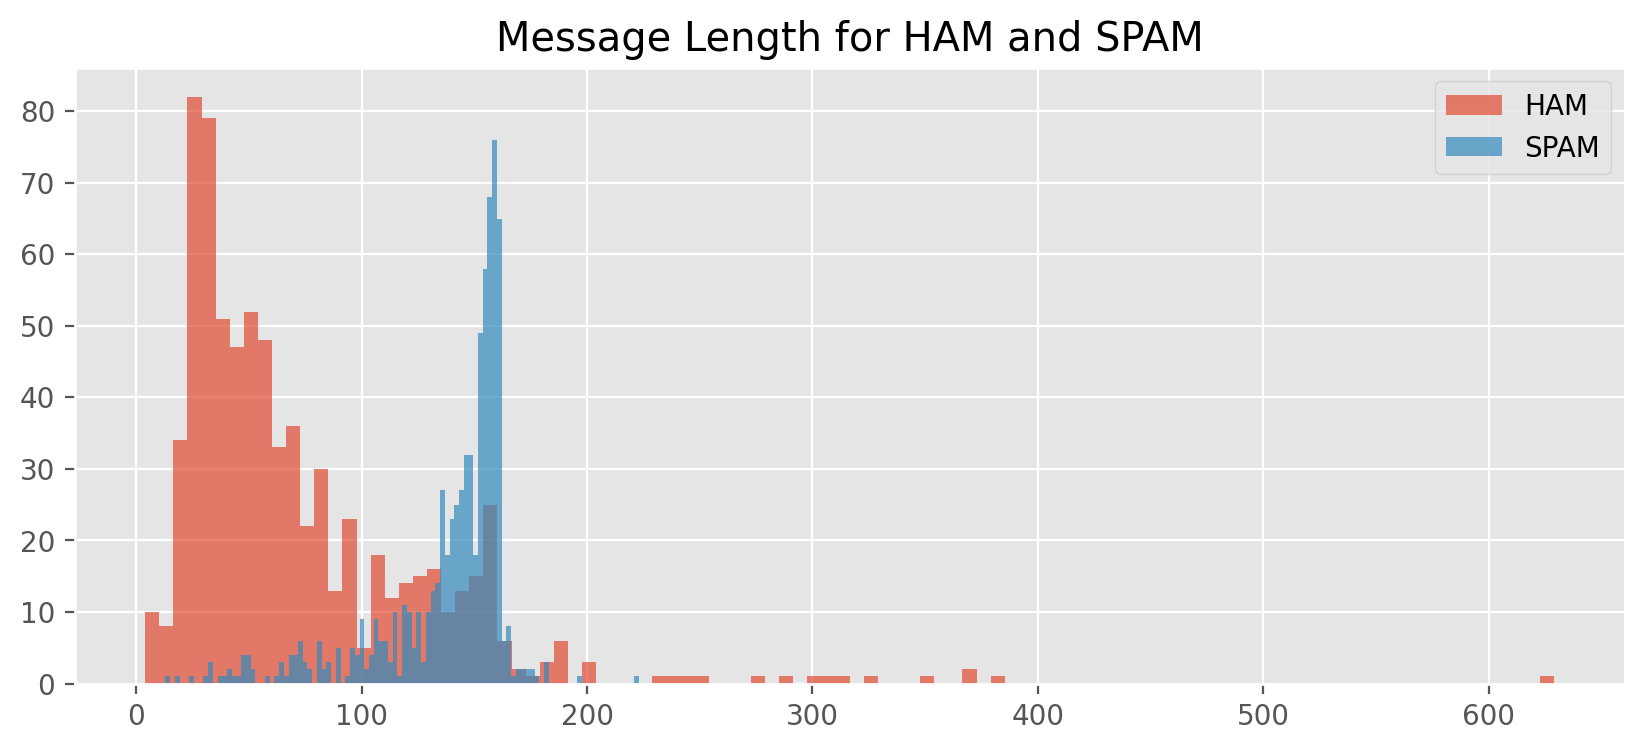

In [21]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')
plt.title('Message Length for HAM and SPAM')
plt.legend()
plt.show()

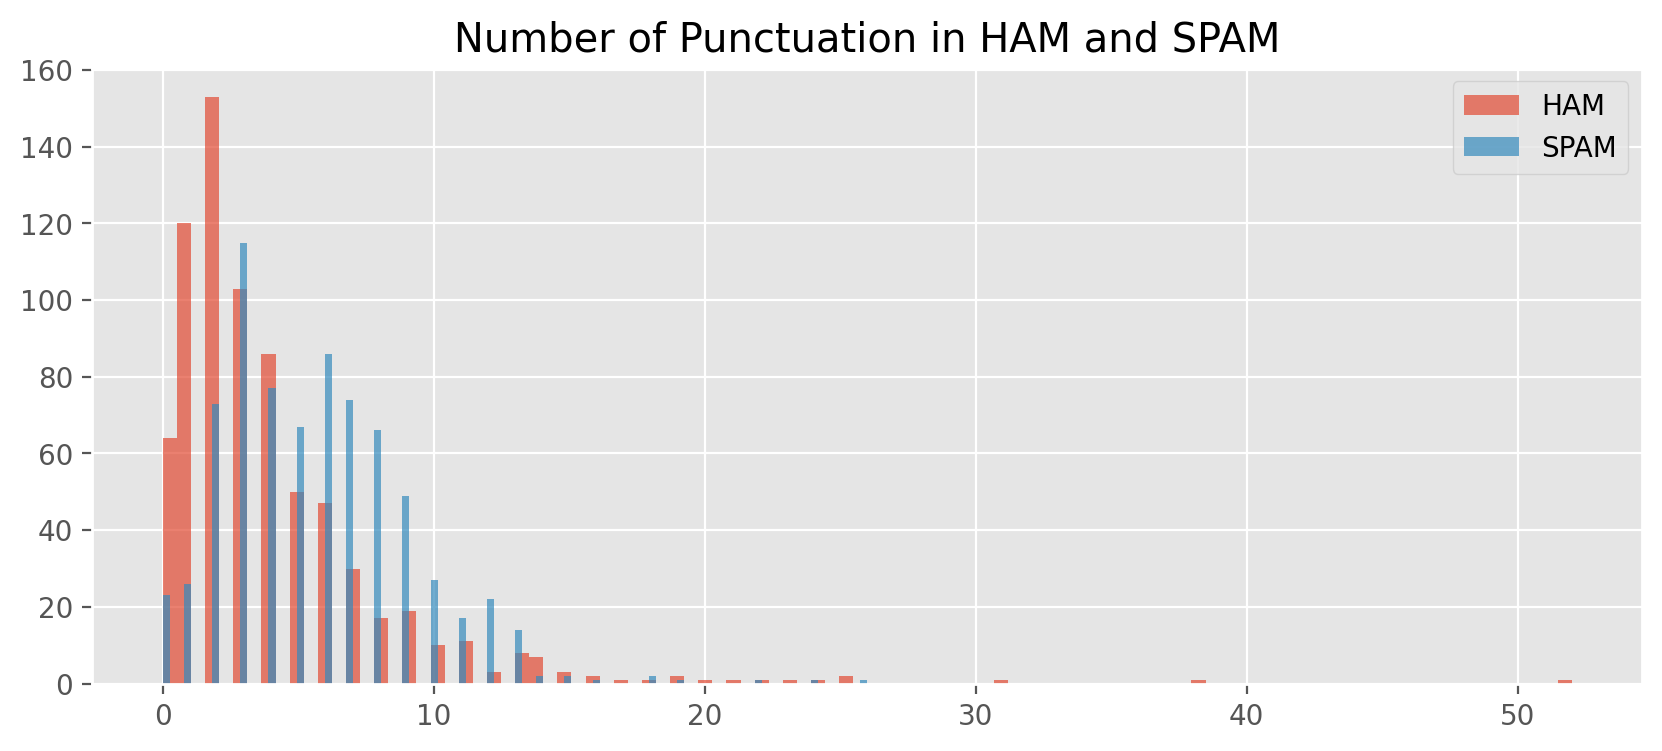

In [22]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')
plt.title('Number of Punctuation in HAM and SPAM')
plt.legend()
plt.show()

## Data Preparation for Training

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'],
                                                   test_size=0.2, random_state=0,
                                                   shuffle=True, stratify=data['label'])

X_train.shape, X_test.shape

((1195,), (299,))

In [25]:
# model Building
clf = Pipeline([('tfidf', TfidfVectorizer()), 
                ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [26]:
y_pred = clf.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       150
        spam       0.99      0.91      0.95       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



In [28]:
clf.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])



array(['spam', 'ham'], dtype=object)

In [29]:
clf.classes_

array(['ham', 'spam'], dtype=object)

## Save and Load Model

In [30]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))


In [31]:
model = pickle.load(open('model.pkl', 'rb'))

In [32]:
model.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])


array(['spam', 'ham'], dtype=object)